# Saving the Music Festival  

### Description:  
Imagine you're the data scientist for a popular music festival, and the event is just a week away. The organizers have realized that their data is a mess, and they need your help to clean and prepare it for analysis. You are provided with a small dataset containing information about ticket sales, customer demographics, and stage schedules, but it's full of errors and inconsistencies. Can you use your pandas skills to wrangle the data and get it ready for analysis?  

### Tasks:  
- **Task 1: Handling Missing Values** - The dataset contains missing values in the 'Sales' column. Use pandas to identify and fill in the missing values with the median sales value for each day.  
- **Task 2: Data Standardization** - The 'Time' column contains inconsistent formats (e.g., 'Morning', 'Afternoon', 'Evening', 'morning', 'afternoon', etc.). Use pandas to standardize the 'Time' column to a consistent format.  
- **Task 3: Data Merging** - The demographic data and stage schedule data are in separate datasets. Use pandas to merge these datasets with the ticket sales data based on the 'Date' column.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data  

This dataset contains a mix of demographic, transactional, and event-related data, which can be used to analyze ticket sales, customer behavior, and festival operations.  

### Columns:  
- **Date:** The date of the ticket sale (format: YYYY-MM-DD)
- **Time:** The time of day the ticket was sold (values: 'Morning', 'Afternoon', 'Evening', or None/missing)
- **Sales:** The number of tickets sold (integer value, or None/missing)
- **Age:** The age of the ticket buyer (integer value between 18 and 65)
- **Gender:** The gender of the ticket buyer (values: 'Male' or 'Female')
- **Location:** The location of the ticket buyer (values: 'USA', 'Canada', or 'UK')
- **Artist:** The name of the performing artist (values: 'Artist1', 'Artist2', or 'Artist3')
- **Stage:** The stage where the artist is performing (values: 'Stage1', 'Stage2', or 'Stage3')

In [2]:
# set the seed
np.random.seed(0)

# ticket sales data
ticket_sales = pd.DataFrame({
    'Date': pd.date_range('2024-06-24', periods=100),
    'Time': np.random.choice(['Morning', 'Afternoon', 'Evening', None, 'morning', 'afternoon', 'evening'], size=100),
    'Sales': np.random.randint(1, 100, size=90).tolist() + [None]*10
})

# demographic data
demographics = pd.DataFrame({
    'Date': pd.date_range('2024-06-24', periods=100),
    'Age': np.random.randint(18, 65, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Location': np.random.choice(['USA', 'Canada', 'UK'], size=100)
})

# stage schedule data
stage_schedule = pd.DataFrame({
    'Date': pd.date_range('2024-06-24', periods=100),
    'Artist': np.random.choice(['Artist1', 'Artist2', 'Artist3'], size=100),
    'Stage': np.random.choice(['Stage1', 'Stage2', 'Stage3'], size=100)
})

# Data Merging

The demographic data and stage schedule data are in separate datasets. Use pandas to merge these datasets with the ticket sales data based on the 'Date' column.

Even though Pandas does have a few methods like `.join()` and `merge`, we are going to make use of a favorite of mine, the Pandas `concat` method. I usually throw it a couple of dataframes, and it will combine them for me. Let's see it in action.

In [3]:
# set the index of all three dataframes to be the date column
ticket_sales.set_index('Date', inplace=True)
demographics.set_index('Date', inplace=True)
stage_schedule.set_index('Date', inplace=True)

# combine into a single dataset
data = pd.concat([ticket_sales, demographics, stage_schedule], axis=1)
data

,Time,Sales,Age,Gender,Location,Artist,Stage
Date,,,,,,,
2024-06-24,morning,59.0,63,Male,USA,Artist1,Stage1
2024-06-25,afternoon,24.0,29,Male,UK,Artist1,Stage3
2024-06-26,Morning,80.0,34,Male,UK,Artist3,Stage3
2024-06-27,None,14.0,42,Male,USA,Artist2,Stage3
2024-06-28,None,86.0,47,Female,Canada,Artist1,Stage3
...,...,...,...,...,...,...,...
2024-09-27,morning,NaN,26,Male,UK,Artist2,Stage3
2024-09-28,Morning,NaN,19,Male,Canada,Artist3,Stage3
2024-09-29,evening,NaN,35,Male,USA,Artist3,Stage3


Let's dig a little deeper on how `pd.concat` works.   

When you use `pd.concat`, you need to specify the axis along which you want to concatenate the DataFrames.  

There are two axes in a DataFrame:  
- axis=0 (default): This is the row axis. When you concatenate along this axis, Pandas stacks the DataFrames vertically, adding new rows.  
- axis=1: This is the column axis. When you concatenate along this axis, Pandas combines the DataFrames horizontally, adding new columns.

In the example above, we want to combine the DataFrames based on the 'Date' column. To do this, we set axis=1 when concatenating. This tells Pandas to match rows with the same 'Date' value and combine the DataFrames horizontally. If we didn't set axis=1, Pandas would stack the DataFrames vertically, resulting in duplicates. By setting axis=1, we get a combined DataFrame with all the columns, matched by the 'Date' column.

# Data Standardization

The 'Time' column contains inconsistent formats (e.g., 'Morning', 'Afternoon', 'Evening', 'morning', 'afternoon', etc.). Use pandas to standardize the 'Time' column to a consistent format.

Let's see what we are working with here...  

Aside from the missing values here, we need to capitalize all the strings so they are consistently formatted.

In [4]:
data['Time'].unique()

array(['morning', 'afternoon', 'Morning', None, 'Afternoon', 'Evening',
       'evening'], dtype=object)

In [5]:
# capitalize all the strings
data.loc[:,'Time'] = data.loc[:,'Time'].str.capitalize()

data['Time'].unique()

array(['Morning', 'Afternoon', None, 'Evening'], dtype=object)

# Handling Missing Values

The dataset contains missing values in the 'Sales' column. Use pandas to identify and fill in the missing values with the median sales value for each day.

The problem with this task is that we only have one value for each date. So getting the median on a single value doesn't make much sense.

In [6]:
# group by the index, which is the date column
group = data.groupby(data.index)

# how many rows per date?
cnt = group.count()

# what dates have more than one sale?
cnt[cnt['Sales'] > 1]

,Time,Sales,Age,Gender,Location,Artist,Stage
Date,,,,,,,


Let's plot the data and see how it looks like.  

I don't see much of a clear pattern here, do you?

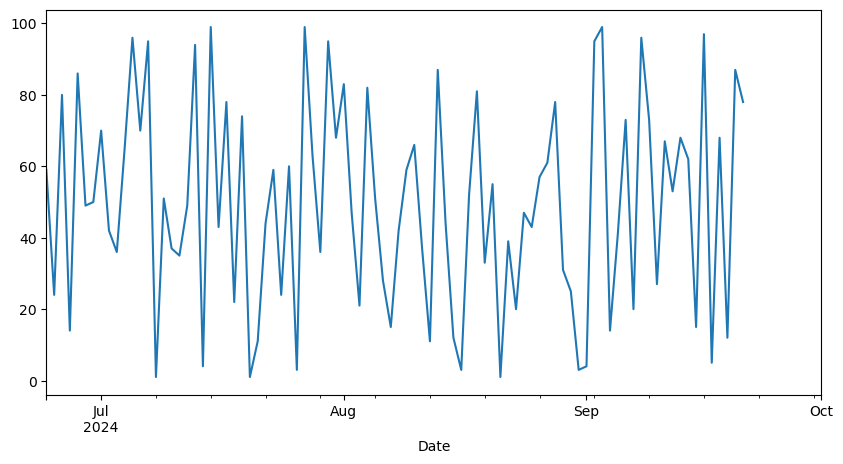

In [7]:
data['Sales'].plot(figsize=(10,5));

If we simply wanted to calculate the median of the dataset and use that value.

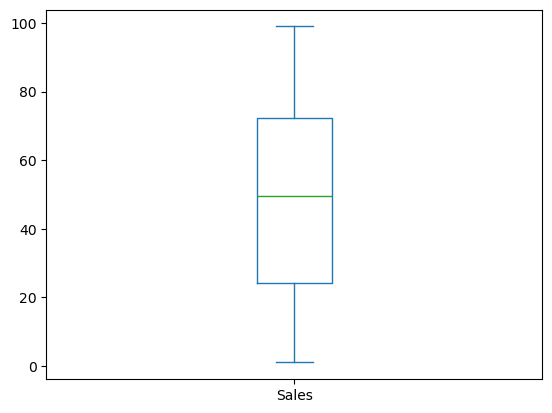

In [8]:
data['Sales'].plot.box();

In [9]:
# the actual median is...
data['Sales'].median()

49.5

We have about 100 days worth of data. Let's try to use a moving median of 7 days and fill the missing values.  

Using the last 7 sales figures, we have a rolling median of 68.

In [10]:
data['Sales'].dropna().rolling(7).median().tail()

Date
2024-09-17    62.0
2024-09-18    62.0
2024-09-19    62.0
2024-09-20    62.0
2024-09-21    68.0
Name: Sales, dtype: float64

Let's go with the rolling median of 68, now all we have to do is fill in the missing values.

In [11]:
data.loc[~data['Sales'].notna(),'Sales'] = 68.0

data.tail(10)

,Time,Sales,Age,Gender,Location,Artist,Stage
Date,,,,,,,
2024-09-22,Morning,68.0,18,Male,Canada,Artist3,Stage2
2024-09-23,Morning,68.0,29,Male,USA,Artist2,Stage2
2024-09-24,None,68.0,52,Female,Canada,Artist3,Stage2
2024-09-25,Morning,68.0,23,Male,USA,Artist2,Stage3
2024-09-26,Morning,68.0,34,Male,UK,Artist3,Stage1
2024-09-27,Morning,68.0,26,Male,UK,Artist2,Stage3
2024-09-28,Morning,68.0,19,Male,Canada,Artist3,Stage3
2024-09-29,Evening,68.0,35,Male,USA,Artist3,Stage3
2024-09-30,Morning,68.0,53,Male,USA,Artist3,Stage3


# Can you make a better prediction for the last 10 days?

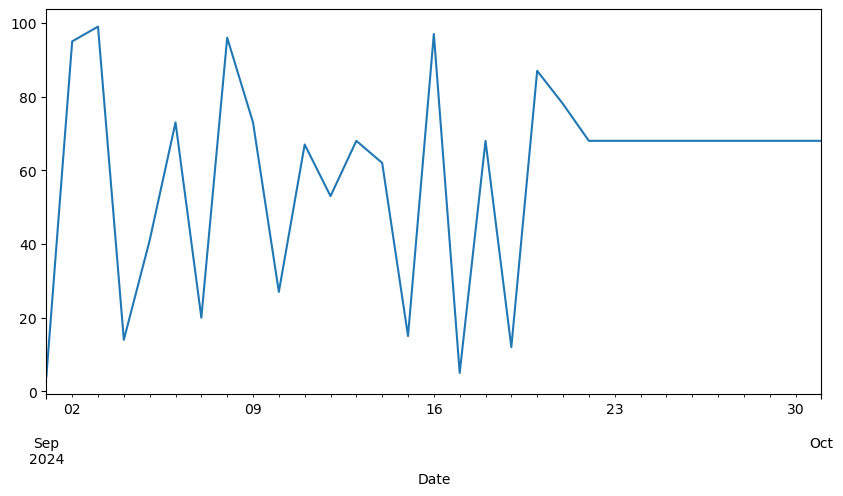

In [12]:
data['Sales']['2024-09':].plot(figsize=(10,5));

# Conclusion  

In this tutorial, you played the role of a data scientist tasked with cleaning and preparing a messy dataset for a popular music festival. The dataset contained information about ticket sales, customer demographics, and stage schedules, but it was full of errors and inconsistencies. You used your Pandas skills to wrangle the data and make it ready for analysis. 

Here’s a quick recap of what you did and what you learned:

- You learned how to handle missing values in a dataset, specifically by calculating the median and filling in missing data appropriately.  
- You learned how to use pandas string methods to clean and standardize data, ensuring consistency in categorical columns.  
- You learned how to merge multiple datasets using pandas, leveraging the `pd.concat` method to combine dataframes horizontally based on a common column.  

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>